In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from datetime import datetime

In [2]:
bitcoin_csv_file = "../03-Presentations/Resources/archive/coin_Bitcoin.csv"
bitcoin_data_df = pd.read_csv(bitcoin_csv_file)

In [3]:
bitcoin_data_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
new_bitcoin_data_df = bitcoin_data_df[['Name', 'High', 'Low']].copy()
new_bitcoin_data_df.head()

,Name,High,Low
0,Bitcoin,147.488007,134.000000
1,Bitcoin,146.929993,134.050003
2,Bitcoin,139.889999,107.720001
3,Bitcoin,125.599998,92.281898
4,Bitcoin,108.127998,79.099998


In [5]:
bitcoin_data_df['DateOnly'] = bitcoin_data_df['Date'].map(lambda x: x.split()[0])
bitcoin_data_df.head()
bitcoin_data_df['TimeOnly'] = bitcoin_data_df['Date'].map(lambda x: x.split()[1])
bitcoin_data_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,DateOnly,TimeOnly
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29,23:59:59
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30,23:59:59
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01,23:59:59
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02,23:59:59
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03,23:59:59


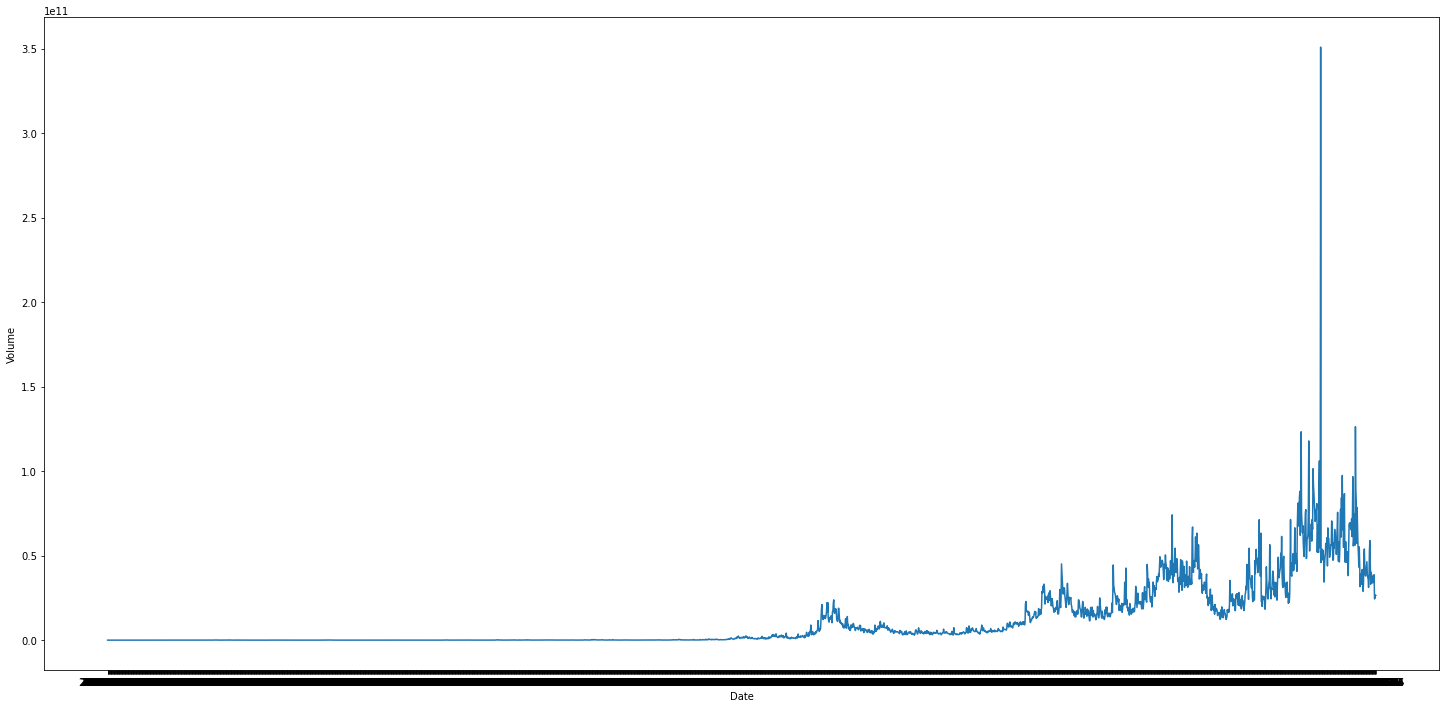

In [6]:
plt.figure(figsize=(25, 12))
x = range(len(bitcoin_data_df['DateOnly']))
plt.plot(x, bitcoin_data_df['Volume'])
plt.xticks(x, bitcoin_data_df['DateOnly'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [7]:
rds_connection_string = "postgres:rocket211@localhost:5432/Crypto_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [8]:
new_bitcoin_data_df = bitcoin_data_df[["Name", "High", "Low"]].copy()
new_bitcoin_data_df.head()

,Name,High,Low
0,Bitcoin,147.488007,134.000000
1,Bitcoin,146.929993,134.050003
2,Bitcoin,139.889999,107.720001
3,Bitcoin,125.599998,92.281898
4,Bitcoin,108.127998,79.099998


In [9]:
rds_connection_string = "postgres:rocket211@localhost:5432/Crypto_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [10]:
new_bitcoin_data_df.to_sql(name='Bitcoin', con=engine, if_exists='append', index=False)

ProgrammingError: (psycopg2.errors.UndefinedColumn) column "Name" of relation "Bitcoin" does not exist
LINE 1: INSERT INTO "Bitcoin" ("Name", "High", "Low") VALUES ('Bitco...
                               ^

[SQL: INSERT INTO "Bitcoin" ("Name", "High", "Low") VALUES (%(Name)s, %(High)s, %(Low)s)]
[parameters: ({'Name': 'Bitcoin', 'High': 147.48800659179688, 'Low': 134.0}, {'Name': 'Bitcoin', 'High': 146.92999267578125, 'Low': 134.0500030517578}, {'Name': 'Bitcoin', 'High': 139.88999938964844, 'Low': 107.72000122070312}, {'Name': 'Bitcoin', 'High': 125.5999984741211, 'Low': 92.28189849853516}, {'Name': 'Bitcoin', 'High': 108.12799835205078, 'Low': 79.0999984741211}, {'Name': 'Bitcoin', 'High': 115.0, 'Low': 92.5}, {'Name': 'Bitcoin', 'High': 118.8000030517578, 'Low': 107.14299774169922}, {'Name': 'Bitcoin', 'High': 124.66300201416016, 'Low': 106.63999938964844}  ... displaying 10 of 2991 total bound parameter sets ...  {'Name': 'Bitcoin', 'High': 35284.34443007, 'Low': 33213.66103397}, {'Name': 'Bitcoin', 'High': 35038.53636342, 'Low': 33599.91616924})]
(Background on this error at: http://sqlalche.me/e/14/f405)

In [ ]:
pd.read_sql_query('select * from "Bitcoin"', con=engine)